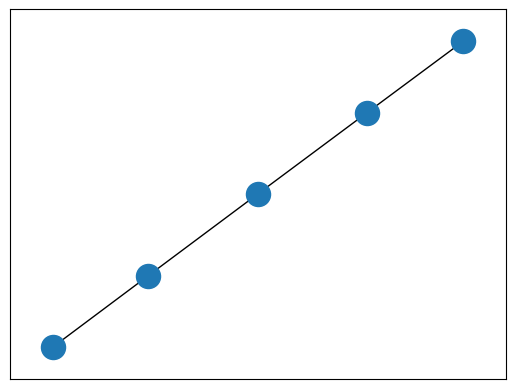

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.path_graph(5)
attrs = {0: {'attr1': 20, 'attr2': 'nothing'}, 1: {'attr2': 3}, 2: {'attr1': 42}, 3: {'attr3': 'hello'}, 4: {'attr1': 54, 'attr3': '33'}}
nx.set_node_attributes(G, attrs)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    node = ind["ind"][0]
    xy = pos[node]
    annot.xy = xy
    node_attr = {'node': node}
    node_attr.update(G.nodes[node])
    text = '\n'.join(f'{k}: {v}' for k, v in node_attr.items())
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = nodes.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [8]:
import networkx as nx

from bokeh.models import Circle, MultiLine
from bokeh.plotting import figure, from_networkx, show

from bokeh.io import output_notebook
output_notebook()
G = nx.karate_club_graph()

G.edges
G.nodes
print(G)
list(G.nodes(data=True))

Loading BokehJS ...

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


[(0, {'club': 'Mr. Hi'}),
 (1, {'club': 'Mr. Hi'}),
 (2, {'club': 'Mr. Hi'}),
 (3, {'club': 'Mr. Hi'}),
 (4, {'club': 'Mr. Hi'}),
 (5, {'club': 'Mr. Hi'}),
 (6, {'club': 'Mr. Hi'}),
 (7, {'club': 'Mr. Hi'}),
 (8, {'club': 'Mr. Hi'}),
 (9, {'club': 'Officer'}),
 (10, {'club': 'Mr. Hi'}),
 (11, {'club': 'Mr. Hi'}),
 (12, {'club': 'Mr. Hi'}),
 (13, {'club': 'Mr. Hi'}),
 (14, {'club': 'Officer'}),
 (15, {'club': 'Officer'}),
 (16, {'club': 'Mr. Hi'}),
 (17, {'club': 'Mr. Hi'}),
 (18, {'club': 'Officer'}),
 (19, {'club': 'Mr. Hi'}),
 (20, {'club': 'Officer'}),
 (21, {'club': 'Mr. Hi'}),
 (22, {'club': 'Officer'}),
 (23, {'club': 'Officer'}),
 (24, {'club': 'Officer'}),
 (25, {'club': 'Officer'}),
 (26, {'club': 'Officer'}),
 (27, {'club': 'Officer'}),
 (28, {'club': 'Officer'}),
 (29, {'club': 'Officer'}),
 (30, {'club': 'Officer'}),
 (31, {'club': 'Officer'}),
 (32, {'club': 'Officer'}),
 (33, {'club': 'Officer'})]

In [ ]:


SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "darkgrey", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

plot = figure(width=400, height=400, x_range=(-1.2, 1.2), y_range=(-1.2, 1.2),
              x_axis_location=None, y_axis_location=None, toolbar_location=None,
              title="Graph Interaction Demo", background_fill_color="#efefef",
              tooltips="index: @index, club: @club")
plot.grid.grid_line_color = None

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="lightblue")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color",
                                               line_alpha=0.8, line_width=1.5)
plot.renderers.append(graph_renderer)

show(plot)